### Feature Engineering

`1: Load Dataset`
    # Pandas built-in functions
    # Load cleaned dataset; pickle
    # Print first 5 entries
    
`2: Feature Engineering`
    # Build features from customerID feature
    # Scale numerical features
    # Encode features
    
`Saved Preprocessed Dataset to pickle`

#### 0 Import Libraries

In [29]:
import numpy as np # for linear algebra
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

In [30]:
# Embed visualizations in Notebooks
%matplotlib inline

In [31]:
# Seaborn style, visualizations
sns.set_style("whitegrid")

In [32]:
# View 50 columns
pd.set_option("display.max_columns", 50)

In [33]:
import pickle # for saving and loading files; maintains state

#### 1 Load Data

In [34]:
customer_data = pd.read_pickle("./Datasets/cleaned_data.pickle")

In [35]:
customer_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2 Feature Engineering

In [36]:
# Split customerID into two columns; number part and string part
customer_data[['customerID-Num', 'customerID-STR']] = customer_data['customerID'].str.split("-", expand=True)

# Drop customerID
customer_data.drop(columns='customerID', inplace=True)

In [37]:
# -> ACT ON LATER
# Scale "Tenure", "MonthlyCharges" and "TotalCharges"
# Encode all other features except "customerID"
# Split "customerID" into two features; num and letters

`Scaling`

    Tenure, Monthly Charges and Total Charges to be on the same scale

In [38]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [39]:
# Features to scale
features_to_scale = customer_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
features_to_scale.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [40]:
scalar = StandardScaler() # Instantiate Standard Scalar
scalar.fit(features_to_scale) # Fit "scalar" onto the features
scaled_features = scalar.transform(features_to_scale) # Transform the features based on "scalar"

In [41]:
# Converting out to DataFrame
scaled_features = pd.DataFrame(data=scaled_features, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

# Assigning back to original DataFrame
customer_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaled_features

`Encoding`

    We will encode all categorical variables
    * Our choice of encoding will be as follows; binary features will be encoded using some Binary Encoder
      and features not binary will encoded using one-hot encoder.

In [42]:
# List of features with binary entries
binary_features = customer_data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']]
binary_features.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
0,Female,No,Yes,No,No,Yes
1,Male,No,No,No,Yes,No


In [43]:
# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder() # Instantiate LabelEncoder

count = 0

# Loop through features
for col in binary_features.columns:
    
    le.fit(binary_features[col]) # Fit encoder on feature
    binary_features[col] = pd.Series(le.transform(binary_features[col])) # Transform data

<ipython-input-44-01a769b38cef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_features[col] = pd.Series(le.transform(binary_features[col])) # Transform data


In [45]:
# Re-assign back encoded values to original customer dataset
customer_data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']] = binary_features

    One-Hot Encoding

In [46]:
# Encoding Multiple Lines Feature
customer_data[["MultipleLines_NoPhoneService", "MultipleLines_Yes"]] = \
pd.get_dummies(customer_data['MultipleLines'], prefix="MultipleLines", drop_first=True)

# Encoding InternetServices Feature
customer_data[["InternetService_FibreOptic", "InternetService_No"]] = \
pd.get_dummies(customer_data['InternetService'], prefix="InternetService", drop_first=True)

# Encoding OnlineSecurity Feature
customer_data[["OnlineSecurity_NoInternetService", "OnlineSecurity_Yes"]] = \
pd.get_dummies(customer_data['OnlineSecurity'], prefix="OnlineSecurity", drop_first=True)

# Encoding OnlineBackup Feature
customer_data[["OnlineBackup_NoInternetService", "OnlineBackup_Yes"]] = \
pd.get_dummies(customer_data['OnlineBackup'], prefix="OnlineBackup", drop_first=True)

# Encoding DeviceProtection Feature
customer_data[["DeviceProtection_NoInternetService", "DeviceProtection_Yes"]] = \
pd.get_dummies(customer_data['DeviceProtection'], prefix="DeviceProtection", drop_first=True)

# Encoding TechSupport Feature
customer_data[["TechSupport_NoInternetService", "TechSupport_Yes"]] = \
pd.get_dummies(customer_data['TechSupport'], prefix="TechSupport", drop_first=True)

# Encoding StreamingTV Feature
customer_data[["StreamingTV_NoInternetService", "StreamingTV_Yes"]] = \
pd.get_dummies(customer_data['StreamingTV'], prefix="StreamingTV", drop_first=True)

# Encoding StreamingMovies Feature
customer_data[["StreamingMovies_NoInternetService", "StreamingMovies_Yes"]] = \
pd.get_dummies(customer_data['StreamingMovies'], prefix="StreamingMovies", drop_first=True)

# Encoding Contract Feature
customer_data[["Contract_OneYear", "Contract_TwoYear"]] = \
pd.get_dummies(customer_data['Contract'], prefix="Contract", drop_first=True)

# Encoding Contract Feature
customer_data[["PaymentMethod_CreditCard", "PaymentMethod_ElectronicCheck", "PaymentMethod_MailedCheck"]] = \
pd.get_dummies(customer_data['PaymentMethod'], prefix="PaymentMethod", drop_first=True)

In [47]:
# Drop encoded features
drop_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Drop features from customer_dataset
customer_data.drop(columns=drop_features, axis=1, inplace=True)

    Encode Target Label

In [48]:
le.fit(customer_data['Churn']) # Fit encoder on target label
customer_data['Churn'] = le.transform(customer_data['Churn']) # Transform label data

#### 3 Correlation

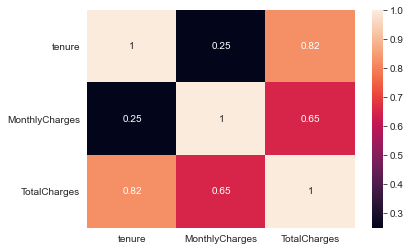

In [51]:
# Correlation
corr = customer_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Draw correlation heatmap
ax = sns.heatmap(corr, annot=True)

`Last min clean-up`

    Delete feature derived from customerID: contain too many categorical entries

In [53]:
customer_data.drop(columns=['customerID-Num', 'customerID-STR'], axis=1, inplace=True)

`Explorting dataset`

In [55]:
import pickle

# Exporting dataset as pickle; to return state of dataset
with open('./Datasets/preprocessed_data.pickle', 'wb') as f:
    pickle.dump(customer_data, f)